## Лабораторная работа 3: Word Embeddings

Эта лабораторная работа посвящена Word Embeddings и различными развесёлыми манипуляциями с ними. Мы будем преобразовывать слова в плотные вектора с помощью двух алгоритмов Word2Vec: cbow и skipgram. Воспользуемся готовым решением, а именно библиотекой gensim. Полную документацию библиотеки можно почитать здесь: https://radimrehurek.com/gensim/apiref.html.

Но для начала подготовим данные. В gensim есть несколько встроенных датасетов, один из них -- text8. Этот датасет содержит выдержки из англоязычной википедии примерно на 32мб. Это немного, но чтобы поиграться сойдёт.

Давайте загрузим этот датасет. Он представляет из себя список списков слов.

In [3]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\programdata\anaconda3\lib\site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gensim.downloader as api

dataset = api.load("text8") 
data = [d for d in dataset]
data[50][:10]

['many',
 'exist',
 'these',
 'choices',
 'give',
 'us',
 'alternative',
 'forms',
 'of',
 'geometry']

Теперь давайте обучим модель w2v, использующую алгоритм cbow. Для этого воспользуемся классом Word2Vec из библиотеки gensim.

In [2]:
from gensim.models import Word2Vec
bow_model = Word2Vec(data,               # датасет
                     window=10,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=0,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

После того, как модель обучилась, мы можем всячески манипулировать полученными векторами. Например векторное представление слоа можно получить так:

In [6]:
bow_model['punk']

array([ 1.0922993 , -3.854602  ,  0.99430835,  3.2642975 ,  0.9664431 ,
        0.2952732 ,  3.3130937 ,  2.4634907 ,  0.82023937, -0.8178907 ,
       -0.6940891 ,  1.3369143 , -0.45195818,  1.4346632 , -2.5835748 ,
        1.766419  ,  1.9424    ,  0.5440489 ,  0.2023618 ,  2.772876  ,
       -3.598379  , -0.74169636,  2.1657257 , -3.0503032 ,  0.45325047,
        2.1388388 , -0.66952866, -1.0576209 ,  0.3184994 ,  4.641581  ,
       -2.1867356 ,  2.8300784 ], dtype=float32)

...а еще можно получить список наиболее похожих слов...

In [7]:
bow_model.most_similar('anxiety')

[('schizophrenia', 0.9081252217292786),
 ('chronic', 0.9036065340042114),
 ('psychosis', 0.9011502265930176),
 ('dysfunction', 0.9010915756225586),
 ('psychomotor', 0.8967258334159851),
 ('disorder', 0.8945344686508179),
 ('nausea', 0.8934134244918823),
 ('symptoms', 0.8911228179931641),
 ('recurrent', 0.8856934309005737),
 ('epilepsy', 0.884541392326355)]

...а еще эти вектора можно складывать и вычитать друг из друга (см. лекцию). Метод $\textit{most_similar}$ принимает два списка слов: positive (которые он складывает) и negative (которые вычитает). Это позволяет получить некоторую аналогию переноса знаний. Самый известный пример: при сложении векторов 'king' и 'woman' и вычитании вектора 'man' должно получиться нечто, близкое к вектору 'queen'. По смыслу это можно интерпретировать так: "как король, только женщина, а не мужчина". 

Давайте узнаем, кого наша модель считает русским Мао Дзе Дуном.

In [8]:
bow_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8404861688613892),
 ('lenin', 0.8012851476669312),
 ('sokolnikov', 0.7843619585037231),
 ('mussolini', 0.7650448679924011),
 ('bolsheviks', 0.7599092721939087),
 ('beria', 0.754613995552063),
 ('regime', 0.7536042332649231),
 ('disillusionment', 0.74192214012146),
 ('nikita', 0.7388641834259033),
 ('repression', 0.7368213534355164)]

$\textbf{Задание.}$ По аналогии постройте и обучите Word2Vec модель, использующую алгоритм skipgram. Изучив особенности алгоритма определите как именно нужно изменить параметры модели по сравнению с алгоритмом cbow (что увеличить, что уменьшить). Размерность векторов-эмбеддингов должна быть равна 32.

In [9]:
sg_model = Word2Vec(data,               # датасет
                     window=3,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=1,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

$\textbf{Задание.}$ Придумайте свой пример на сложение и вычитание векторов.

$\textit{NB.}$ Как уже было отмечено, text8 является сравнительно небольшим датасетом, а размерность 32 является весьма скромной для векторов-эмбеддингов (стандартным значением является 300). Оба этих факта отрицательно влияют на качество эмбеддингов. Поэтому если результат вычисления не соответствует вашим ожиданием, то это может быть связано не только с плохой настройкой вашей модели, но и с низкой встречаемостью выбранных вами слов. Попробуйте разные примеры на сложение и поэкспереминтируйте с настройками параметров модели.


In [10]:
sg_model.most_similar(positive=['dog', 'cat'])

[('ass', 0.8957105875015259),
 ('goat', 0.8897037506103516),
 ('albino', 0.8821367025375366),
 ('bee', 0.8813740015029907),
 ('pig', 0.8791407346725464),
 ('hamster', 0.8766051530838013),
 ('rat', 0.874596357345581),
 ('ox', 0.8645768761634827),
 ('cow', 0.8644306659698486),
 ('elk', 0.8573561906814575)]

In [22]:
sg_model.most_similar(positive=['soldier'], negative=['war'])

[('priest', 0.4761127531528473),
 ('soprano', 0.4727579951286316),
 ('dancer', 0.4595986008644104),
 ('gentleman', 0.45694267749786377),
 ('flute', 0.4554888904094696),
 ('millionaire', 0.4382752776145935),
 ('conductor', 0.4380255937576294),
 ('friend', 0.4375230669975281),
 ('collector', 0.43653249740600586),
 ('physician', 0.42585960030555725)]

In [12]:
sg_model.most_similar(positive=['russia', 'putin'])

[('sukarno', 0.9405256509780884),
 ('vichy', 0.934156596660614),
 ('mobutu', 0.9296931028366089),
 ('fmln', 0.9207330942153931),
 ('fidel', 0.91746586561203),
 ('allende', 0.915804386138916),
 ('bolshevist', 0.9130719900131226),
 ('mpla', 0.9129500985145569),
 ('makarios', 0.9124364852905273),
 ('kpd', 0.9118727445602417)]

Давайте визуализируем построенные вашей моделью эмбеддинги. Будем передавать значения компонент как цвета.

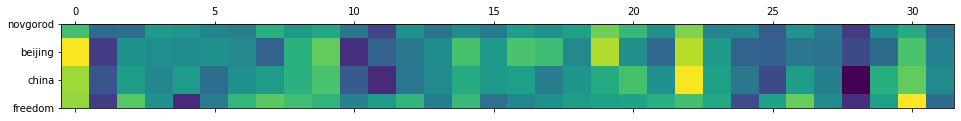

In [14]:
import matplotlib.pyplot as plt
import numpy as np

words_to_show=['novgorod', 'beijing', 'china', 'freedom']

nrows = len(words_to_show)
ncols = 32

image = np.zeros([nrows, ncols]) 
for i in range(nrows):
    word = words_to_show[i]
    image[i]=sg_model[word]
    
plt.matshow(image) 
plt.yticks(range(nrows), words_to_show) 
plt.show() 

$\textbf{Задание.}$ Порефлексируйте над полученной выше картинкой. Подумайте над тем, какие пары векторов должны быть больше визуально похожи друг на друга, а какие меньше, и соответствует ли результат действительности. 

$\textbf{Задание.}$ Реализуйте функцию скалярного произведения векторов и с помощью неё оцените, какая пара векторов похожа друг на друга сильнее -- novgorod и beijing или china и freedom?

In [25]:
def mul (arr1, arr2):
    l1 = np.linalg.norm(arr1)
    l2 = np.linalg.norm(arr2)
    
    arr1 = arr1/l1
    arr2 = arr2/l2
    return np.dot(arr1, arr2)

novgorod = sg_model['novgorod']
beijing = sg_model['beijing']
china = sg_model['china']
freedom = sg_model['freedom']

print('Novgorod and Bejing:', mul(novgorod, beijing))

print('China and Freedom:', mul(china, freedom))

Novgorod and Bejing: 0.71538985
China and Freedom: 0.6119065


#### Проекция на плоскость: PCA

32-мерные вектора -- это, конечно, здорово, но картинка выше не слишком уж информативна. Было бы очень интересно посмотреть на эти вектора в пространстве и оценить как они группируются в кластеры. Но мы, люди, привыкли смотреть на 2-х и 3-х мерные вектора (ну или точки), в то время как наши эмбеддинги состоят из 32-х размерностей... Хорошая новость! Существуют алгоритмы понижения размерности.

Самым простым из них является алгоритм PCA (Principal Component Analysis -- Метод Главных Компонент).

В геометрическом смысле, PCA пытается найти такие оси, вдоль которых происходит наибольшая часть разброса значений. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">

В алгебраическом смысле, PCA пытается разложить матрицу $X$, содержащую вектора, на две матрицы меньшего размера: $W$ и $\hat W$ так, чтобы минимизировать среднее квадратичное отклонение:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - матрица объектов;
- $W \in \mathbb{R}^{m \times d}$ - матрица прямого преобразования;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - матрица обратного преобразования;
- $n$ -- число объектов, $m$ -- исходная размерность $d$ -- итоговая размерность;



Давайте выберем 12 слов, с помощью вашей модели получим эмбеддинги и попытаемся визуализировать их на плоскости. Пусть 4 слова соответствуют условной теме 'мировые лидеры', ещё 4 -- теме 'растительность', а оставшиеся 4 -- теме 'программирование'.

In [17]:
words = ['putin', 'trump', 'berlusconi', 'merkel', 'flower', 'tree', 'leaf', 'pine', 'programming', 'code', 'python', 'java']
word_vectors = np.array([sg_model[word] for word in words])

$\textbf{Задание.}$ Примените алгоритм PCA из библиотеки sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA) к эмбеддинам, чтобы получить из них двумерные вектора. Полезным также будет применить нормализацию к полученным векторам.

In [18]:
from sklearn.decomposition import PCA

word_vectors_pca = PCA(n_components=2)
word_vectors_pca = word_vectors_pca.fit_transform(word_vectors)

Что же, если вы всё сделали правильно, то теперь полученные вектора можно визуализировать!

In [19]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

$\textbf{Задание.}$ Порефлексируйте над картинкой, которую строит код ниже. Оцените насколько хорошо точки группируются в кластеры, соответствующие выбранным 'условным темам'.

In [20]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# Наведите курсором на точку -- появится слово!

Figure(id='1003', ...)